<a href="https://colab.research.google.com/github/sessihode/Projet-2/blob/main/Projet_Boursier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- Introduction

L’objectif de cette étude est de prédire la variable Close à partir de six variables explicatives :
Open, Last, High, VWAP, Low et Prev Close, en utilisant un modèle de régression linéaire multiple.
Ce travail est réalisé à l’aide de Python sur l’environnement Jupiter Notebook.

2- Description du jeu de données

Le jeu de données utilisé provient d’un fichier CSV contenant les informations journalières d’une action boursière.
Il est extrait du dataset intitulé “NIFTY-50 Stock Market Data (2000 - 2021)”, disponible sur la plateforme Kaggle.
Chaque ligne représente une journée de cotation, avec plusieurs colonnes décrivant le comportement du titre ce jour-là. Les variables principales sont :

• Open : le cours d’ouverture de l’action,

• Last : le dernier cours enregistré,

• High : le cours le plus élevé de la journée,

• Low : le cours le plus bas de la journée,

• Prev Close : le cours de clôture de la veille,

• VWAP : le cours moyen pondéré par le volume,

• Close : le cours de clôture (variable cible).

Ce jeu de données est typique dans les analyses financières et convient parfaitement à un modèlede régression.

3- Etapes de réalisation

3.1 Importation des bibliothèque
Cette étape consiste à charger les librairies Python nécessaires pour le projet :

pandas pour manipuler les données tabulaires,

numpy pour les calculs numériques,

sklearn.model selection pour séparer les données en ensembles d’entraînement et de test,

sklearn.linear model pour construire le modèle de régression,

sklearn.metrics pour mesurer la performance du mod`ele (MSE, R²).

C’est la base pour permettre tous les traitements à venir

In [ ]:
import pandas as pd
import numpy as np
from sklearn . model_selection import train_test_split
from sklearn . linear_model import LinearRegression
from sklearn . metrics import mean_squared_error , r2_score

3.2 Chargement et affichage des données

Le fichier CSV contenant les données boursières est importé dans Jupiter Notebook. Il est ensuite lu par pandas et affiché pour vérifier sa structure. Cette étape permet d’avoir une première vue sur les colonnes, les types de données et le format général du jeu de données.

In [6]:
df = pd . read_csv("/content/INFY.csv")
df . head ()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFOSYSTCH,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFOSYSTCH,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFOSYSTCH,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFOSYSTCH,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFOSYSTCH,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


In [8]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,INFY,EQ,1333.80,1332.25,1351.3,1321.00,1345.0,1343.55,1343.19,7088606,9.521361e+14,130375.0,4218129.0,0.5951
5302,2021-04-27,INFY,EQ,1343.55,1346.00,1353.0,1340.15,1347.5,1348.50,1346.89,3636115,4.897445e+14,145974.0,1871084.0,0.5146
5303,2021-04-28,INFY,EQ,1348.50,1358.00,1359.5,1344.60,1355.8,1356.00,1353.45,4879234,6.603778e+14,137376.0,2857134.0,0.5856
5304,2021-04-29,INFY,EQ,1356.00,1368.00,1369.0,1351.40,1356.0,1356.35,1360.05,5412357,7.361090e+14,119277.0,3130945.0,0.5785
5305,2021-04-30,INFY,EQ,1356.35,1346.30,1373.9,1345.90,1348.6,1354.35,1361.16,8354677,1.137203e+15,131718.0,5408113.0,0.6473


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [10]:
df.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [11]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2.456000e+03,4.797000e+03,4797.000000
mean,2584.356643,2584.665266,2626.204297,2539.065002,2581.678345,2581.885215,2582.749548,2.622813e+06,3.855758e+14,1.118490e+05,1.574596e+06,0.536366
std,1796.807396,1796.731660,1842.170527,1743.052412,1789.259360,1789.462674,1792.981289,4.202984e+06,3.808224e+14,9.020307e+04,2.269940e+06,0.179496
min,526.450000,509.250000,558.000000,509.250000,529.150000,526.450000,531.330000,3.291000e+03,2.933192e+12,1.350000e+03,4.352000e+03,0.045800
25%,1216.062500,1213.675000,1233.675000,1197.925000,1215.750000,1216.062500,1214.647500,7.166842e+05,2.065910e+14,5.922600e+04,4.074360e+05,0.455700
50%,2265.675000,2265.000000,2294.300000,2232.475000,2263.275000,2265.575000,2262.210000,1.210798e+06,2.911119e+14,9.025650e+04,8.011600e+05,0.579900
75%,3170.562500,3174.762500,3210.037500,3124.575000,3170.750000,3169.350000,3168.457500,2.784006e+06,4.335687e+14,1.354770e+05,1.986846e+06,0.663700
max,16855.900000,16800.000000,16875.250000,16253.000000,16875.250000,16855.900000,16646.380000,9.043339e+07,8.323905e+15,1.643015e+06,5.775916e+07,0.996000


3.3 Nettoyage des données

Le nettoyage des données est crucial pour garantir la qualité des résultats. Ici, on :

supprime les doublons (lignes identiques),

élimine les lignes avec des valeurs manquantes dans les colonnes clés.

Ce filtrage assure que le modèle sera formé sur des données complètes et fiables.

In [12]:
df = df.drop_duplicates()
df = df.dropna(subset =["Open" , "Last" , "High" , "VWAP", "Low", "Prev Close" , "Close"])

3.4 Sélection des variable

On sélectionne les colonnes qui seront utilisées dans le modèle :

Variables explicatives : Open, Last, High, VWAP, Low, Prev Close.

Variable cible : Close.

Ces choix sont fondés sur leur pertinence financière : ce sont toutes des informations disponibles au cours de la journée, susceptibles d’expliquer le cours de clôture.

In [13]:
features = ["Open" , "Last" , "High" , "VWAP", "Low", "Prev Close"]
target_column = "Close"
X = df[features]
y = df[target_column]

3.5 Séparation des données

Les données sont divisées en deux sous-ensembles :

Ensemble d’entraînement (80%) pour apprendre les paramètres du modèle.

Ensemble de test (20%) pour évaluer la capacité de généralisation du modèle.

Cela permet de mesurer la performance sur des données que le modèle n’a pas vue.

In [14]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size =0.2 , random_state =42)

4.6 Heatmap de corrélation des variables

La heatmap de la matrice de corrélation permet de visualiser les relations linéaires entre les variables du jeu de données. Elle aide à identifier les variables fortement corrélées, ce qui peut influencer le choix des variables à inclure dans le modèle et prévenir les problèmes de multicolinéarité.

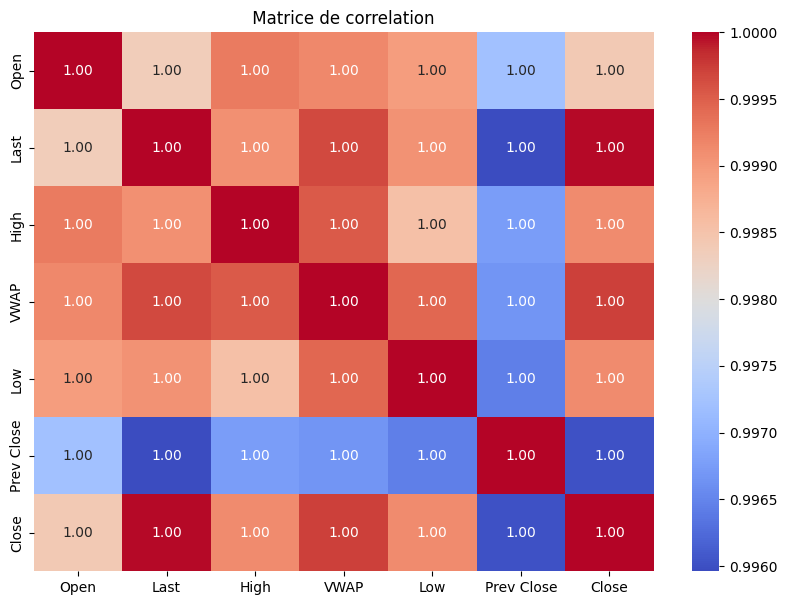

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(10 , 7))
sns.heatmap(df[["Open" , "Last" , "High" , "VWAP", "Low", "Prev Close" , "Close"]]. corr () , annot = True , cmap = "coolwarm" , fmt = ".2f")
plt.title(" Matrice de correlation ")
plt.show()

3.7 Entraînement du modèle

Le modèle de régression linéaire multiple est entraîné à l’aide des données d’entraînement. Le modèle ajuste des coefficients (bêtas) pour chaque variable explicative afin de minimiser l’erreur entre les prédictions et les valeurs réelles de Close

In [16]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

3.8 Evaluation du modèle

Les performances du modèle sont mesurées à l’aide de deux métriques :

MSE (Mean Squared Error) : erreur moyenne quadratique entre les prédictions et les vraies valeurs.

R² (coefficient de détermination) : mesure la proportion de la variance expliquée par le modèle.

Plus R² est proche de 1, mieux le modèle prédit.

In [17]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE : {mse :.4f}")
print(f"R ^2 : {r2 :.4f}")

MSE : 227.1122
R ^2 : 0.9999


3.9 Affichage des coefficients

On extrait les coefficients (poids) appris par le modèle pour chaque variable explicative, ainsi que l’intercept beta0. Cela permet d’interpréter leur influence sur la variable cible :

Le coefficient beta0, appelé intercept, représente la valeur prédite de Close lorsque toutes les variables explicatives sont nulles. Il joue un rôle important dans l’ajustement vertical de la droite de régression aux données réelles.

Un coefficient positif signifie qu’une augmentation de la variable fait augmenter la prédiction de Close.

Un coefficient négatif indique une influence inverse.

In [18]:
coefficients = pd.DataFrame({"Variable": features, "Coefficient beta": model.coef_})
print(coefficients)
print(" Intercept ( beta0 ) = " , model.intercept_)

     Variable  Coefficient beta
0        Open         -0.032896
1        Last          0.860783
2        High         -0.003824
3        VWAP          0.167024
4         Low          0.010818
5  Prev Close         -0.001786
 Intercept ( beta0 ) =  0.4408077149237215


4- Graphique : Valeurs réelles vs Valeurs prédites

Cela permet de voir si le modèle fait de bonnes prédictions.

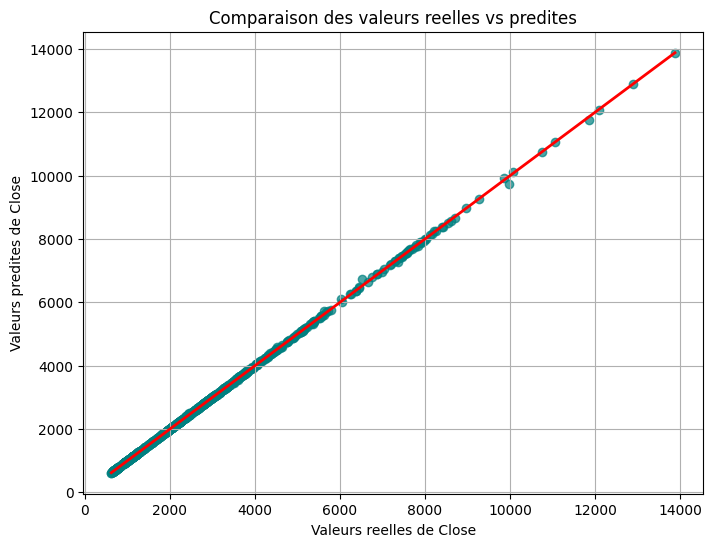

In [19]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
plt.figure(figsize =(8 ,6))
plt.scatter(y_test , y_pred , alpha =0.7 , color = "teal")
plt.plot([y_test.min() , y_test.max()] , [y_test. min() , y_test.max()] , "r", linewidth =2)
plt.xlabel("Valeurs reelles de Close")
plt.ylabel("Valeurs predites de Close")
plt.title("Comparaison des valeurs reelles vs predites")
plt.grid(True)
plt.show()

5- Affichage des valeurs réelles vs valeurs prédites

Ce bloc de code permet de comparer les valeurs réelles de la variable cible Close aux valeurs prédites par le modèle de régression linéaire multiple. En regroupant ces deux séries de données dans un tableau DataFrame, on peut observer de manière détaillée la performance du modèle pour chaque observation de l’échantillon de test. Cela offre une vision directe des écarts entre les prédictions et la réalité, et complète l’analyse visuelle du graphique.

In [20]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({"Valeur reelle" : y_test.values , "Valeur predite" : y_pred})
print(comparison.head(10))

   Valeur reelle  Valeur predite
0        4058.55     4052.842856
1        1152.45     1150.845220
2        1339.45     1339.775220
3        2750.65     2753.863363
4        1950.85     1953.992941
5        2188.30     2184.214104
6        2222.65     2223.703730
7        2282.05     2289.417368
8        1154.00     1152.746452
9        2120.95     2110.241282


6- Calcul du prix de clôture estimé avec un modèle linéaire

Ce code utilise un modèle mathématique simple pour estimer le prix de clôture d’une action
en fonction de plusieurs valeurs comme le prix d’ouverture, le prix le plus haut, le plus bas, et
d’autres indicateurs. Chaque variable est multipliée par un coefficient qui reflète son influence,
puis la somme donne la prédiction finale. Cela aide à comprendre comment les différentes données
financières impactent le cours de clôture.

In [21]:
# Coefficients du modele
beta_0 = 0.4408077149200835
beta_Open = -0.032896
beta_Last =  0.860783
beta_High = -0.003824
beta_VWAP =  0.167024
beta_Low = 0.010818
beta_PrevClose =  -0.001786
# Exemple de valeurs pour les variables explicatives
Open = 144.65
Last = 144.9
High = 147.0
VWAP = 144
Low = 140.65
PrevClose = 143.2
# Prediction de Close
predicted_Close = (
beta_0
+ beta_Open * Open
+ beta_Last * Last
+ beta_High * High
+ beta_VWAP * VWAP
+ beta_Low * Low
+ beta_PrevClose * PrevClose
)
print("Valeur predite de Close :" , round(predicted_Close , 4))

Valeur predite de Close : 145.165


7- Conclusion

Ce rapport présente une analyse complète basée sur un modèle de régression linéaire multiple appliqué à la prédiction du prix de clôture d’une action à partir de variables intrajournalières.

La qualité du modèle est jugée à travers deux indicateurs principaux : l’erreur quadratique moyenne (MSE) et le coefficient de détermination R2

. Les résultats obtenus sont très satisfaisants avec un MSE de 227.1122 et un R2 proche de 1.0000, ce qui indique une excellente performance du modèle.

Les coefficients estimés permettent d’interpréter l’impact de chaque variable explicative sur la variable cible.

Ainsi, les variables les plus influentes sont : Last (β = 0.860783), Low (β = 0.010818), et VWAP (β = 0.167024), tandis que d’autres comme Prev Close ont un effet plus modéré ou légèrement négatif.

Ces résultats confirment l’utilité des données intrajournalières dans la prévision des prix de clôture, tout en montrant que certaines variables sont plus prédictives que d’autres.